In [28]:
from gaia_download import gaia_cone_search_5d
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.coordinates import ICRS, SkyCoord

In [4]:
RA: float = 11.7980
DEC: float = 85.2440

# Download 5D data for NGC 188

NGC 188 coordinates (ICRS):

$\alpha$ = 11.7980$^\circ$

$\delta$ = +85.2440$^\circ$

It is located by est. 1.17 kpc and has a radius of ~4 pc.

Therefore, I am going to fetch all the objects with parallaxes within 0.75 and 1.

In [13]:
sources: pd.DataFrame = gaia_cone_search_5d(RA, DEC, 1.,
                                           min_parallax=0.25,
                                            max_parallax=0.75)

Executing cone search for ra=+11.80 and dec=+85.24 with radius of 1.0...
Executing query:

        SELECT source_id, ra, dec, parallax, parallax_error, 
        pmra, pmra_error, pmdec, pmdec_error, DISTANCE(
           POINT('ICRS', +11.80, +85.24),
           POINT('ICRS', ra, dec)) AS ang_sep  
        FROM gaiadr3.gaia_source 
        WHERE 1 = CONTAINS( 
            POINT('ICRS', ra, dec), 
            CIRCLE('ICRS', +11.80, +85.24, 1.0)) 
        AND parallax > 0.25 AND parallax < 0.75 
    
INFO: Query finished. [astroquery.utils.tap.core]
Query finished!


In [14]:
sources.head()

,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ang_sep
0,2300141938344743680,359.893132,85.175524,0.401293,0.147429,1.235021,0.143220,0.979092,0.152118,0.995026
1,2300142762978486272,359.807062,85.196739,0.593997,0.129462,2.480786,0.126916,-2.629402,0.121067,0.998827
2,2300142831697977088,359.979770,85.216151,0.587936,0.380755,-14.802001,0.360930,1.612288,0.371385,0.981875
3,2300143042152635264,359.924939,85.230875,0.283472,1.129248,-2.839473,1.165944,-2.467185,0.994107,0.984650
4,2300143106575898496,359.906528,85.234690,0.578207,0.242102,-5.255996,0.251423,-0.241723,0.242633,0.985749


In [15]:
sources.ra.max()

359.99240237050975

In [16]:
sources[(sources['ra']>20) & (sources['ra']<30)].head()

,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ang_sep
4720,573667687826923648,20.151816,84.571039,0.639309,0.406949,0.070653,0.515519,-0.225713,0.613166,0.997093
4721,573667687828321408,20.144699,84.570639,0.509105,0.044984,-0.927877,0.055444,0.803730,0.055010,0.996915
4726,573667859627014400,20.057579,84.567426,0.550064,0.072116,-2.389332,0.091920,0.041695,0.087700,0.993554
4727,573667859627015168,20.034705,84.564342,0.539638,0.026685,-4.899182,0.033710,0.150384,0.032215,0.994311
4831,573673563343578624,20.168716,84.592842,0.641635,0.058298,-4.362186,0.090944,-3.127062,0.075510,0.982604


In [19]:
sources[sources['ra']<100].ra.max()

23.863672304004425

In [20]:
sources['ra'].min()

0.008755139595854444

In [26]:
sources.to_csv('./data/ngc_188/1_deg.csv', index=None)

In [29]:
sky_coords: list[SkyCoord] = SkyCoord(ra=sources.ra.values, dec=sources.dec.values,
                                      frame=ICRS, unit=(u.deg, u.deg))

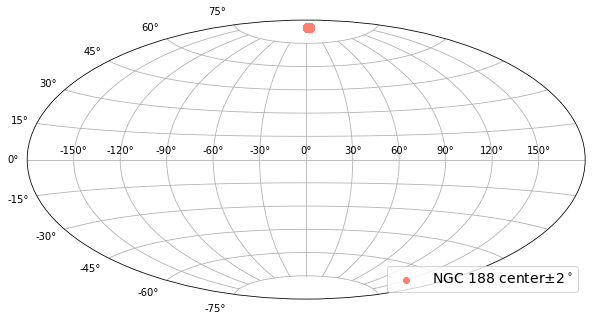

In [30]:
plt.figure(figsize=(10, 7))
plt.subplot(111, projection="aitoff")
plt.scatter(sky_coords.ra.radian, sky_coords.dec.radian, color='salmon', label=r'NGC 188 center$\pm 2^\circ$')
plt.grid()
plt.legend(loc='lower right', fontsize=14)